In [1]:
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
m = len(t_u)
t_c = torch.tensor(t_c).reshape(m, 1)
t_u = torch.tensor(t_u).reshape(m, 1)
t_c /= 30
t_u /= 70

In [2]:
theta = torch.ones(2, 1)
eta, epoch = 0.01, 15000
t_u = torch.hstack((torch.ones((m, 1)), t_u))

for i in range(epoch):
    last = theta.clone()
    theta -= eta * 2 / m * t_u.T @ (t_u @ theta - t_c)
    if torch.equal(last, theta):
        print(i)
        break

theta

13936


tensor([[-0.5768],
        [ 1.2524]])

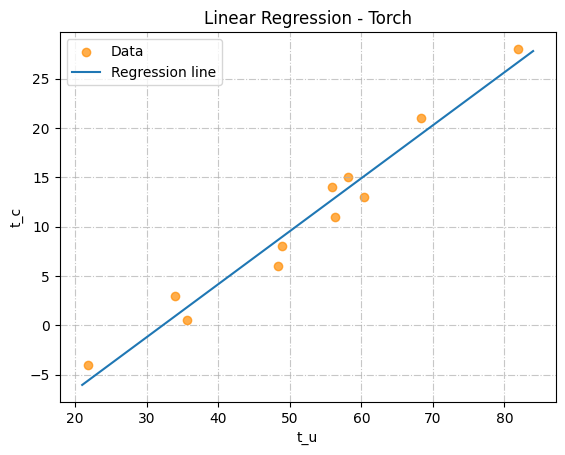

In [3]:
import matplotlib.pyplot as plt

plt.scatter(70 * t_u[:, 1], 30 * t_c, color="darkorange", alpha=0.7, label='Data')
x_vals = torch.linspace(0.3, 1.2, 2)
y_vals = theta[0][0] + theta[1][0] * x_vals
plt.plot(70 * x_vals, 30 * y_vals, label='Regression line')
plt.title('Linear Regression - Torch')
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.legend()
plt.grid(linestyle='-.', alpha=0.7)
plt.show()